# Youtube Video & Channel Data Analysis
By Pin-Huey Chiang, Hung-Yi Lin

**This data analysis provided information for people who wants to become Youtuber of how to earn money and become a successful Youtuber.**

**Possible factors to become a successful Youtuber:**
1. Youtube channel types (types that most people like to watch)
2. Have many subscribers and video views 
3. Youtube channels that have more trending videos

**Four measurements of whether a Youtube channel is successful:**
1. Amount of money they earned
2. Number of subscribers
3. Number of video views
4. Number of trending videos

## Hypothesis
1. Top 250 ranking Youtubers (by grade, subs, views) in the U.S. will have more chances to earn more money than office workers
2. If you want to be a top-ranking Youtuber, it will be more profitable to operate the entertainment type channel than other types of channel such as comedy, music, fashion, knowledge, and etc
3. Entertainment videos will likely to trend more than other types of videos such as comedy, music, fashion, knowledge, and etc
4. The video category that has the most trending videos will have more subscribers than other categories. 
    - Does more trending videos make them enter top 250 us youtubers
    - On the other hand, does top 250 youtubers (by grade, subs, views) means they have they most trending videos 
    - does more subscribers means more video views (have relationship???)

## Hypothesis 1
### Top 250 ranking Youtubers (by grade, subs, views) in the U.S. will have more chances to earn more money than office workers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

## Hypothesis 2
### If you want to be a top-ranking Youtuber, it will be more profitable to operate the entertainment type channel than other types of channel such as comedy, music, fashion, knowledge

In [2]:
top250_subs_df = pd.read_csv('data/top250_us_youtube_by_subs.csv')
top250_views_df = pd.read_csv('data/top250_us_youtube_by_views.csv')

In [3]:
# clean the data - some row of data contains ',' and '--' which will not allow us to directly transfer the datatype 
top250_views_df['Views'] = top250_views_df['Views'].str.replace(',', '')
top250_views_df['Subscribers'] = top250_views_df['Subscribers'].str.replace('--', '0')

In [4]:
# turn the object type into string type first, than Int64
top250_views_df['Views'] = top250_views_df['Views'].astype(str).astype(int)
top250_views_df['Subscribers'] = top250_views_df['Subscribers'].astype(str).astype(int)

In [5]:
desc_subs = top250_subs_df.sort_values(by='Max Yearly Earning',ascending=False)
desc_views = top250_views_df.sort_values(by='Max Yearly Earning',ascending=False)

In [6]:
desc_subs.drop(desc_subs.head(1).index,inplace=True)
desc_subs.drop(desc_subs.tail(3).index,inplace=True)
desc_views.drop(desc_views.head(1).index,inplace=True)
desc_views.drop(desc_views.tail(3).index,inplace=True)

In [7]:
def pivottable_Creation(df_name):
    pivotTable = pd.pivot_table(df_name, values=['Uploads', 'Subscribers', 'Views', 'URL', 'Min Yearly Earning', 'Max Yearly Earning'], 
                            index=['Category'], aggfunc={'Uploads': np.sum, 'Subscribers': np.sum, 'Views': np.sum, 
                                                         'URL': 'count', 'Min Yearly Earning':np.sum, 'Max Yearly Earning':np.sum})
    return pivotTable

In [8]:
categories_subs_df = pivottable_Creation(top250_subs_df)
categories_views_df = pivottable_Creation(top250_views_df)

data_subs = pivottable_Creation(desc_subs)
data_views = pivottable_Creation(desc_views)

In [9]:
# categorical total earning / channel count
def dataframe_Creation(df_name):
    df_name.columns = ['Max Yearly Earning', 'Min Yearly Earning', 'Subscribers', 'Youtuber Count', 'Uploads', 'Views']
    df_name['Avg Min Yearly Earning'] = df_name['Min Yearly Earning'] / df_name['Youtuber Count']
    df_name['Avg Max Yearly Earning'] = df_name['Max Yearly Earning'] / df_name['Youtuber Count']
    pd.options.display.float_format = '${:,.2f}'.format
    df_name.reset_index(inplace=True)
    df_name = df_name.sort_values(by=['Avg Max Yearly Earning'], ascending=False)
    return df_name

In [10]:
categories_subs_info = dataframe_Creation(categories_subs_df)
categories_views_info = dataframe_Creation(categories_views_df)

info_subs = dataframe_Creation(data_subs)
info_views = dataframe_Creation(data_views)

In [11]:
d1 = categories_subs_info [['Category', 'Youtuber Count']]
d2 = categories_views_info [['Category', 'Youtuber Count']]
info = pd.merge(d1, d2, how='outer', on=['Category'])
info.set_index('Category', inplace=True)
info.columns = ['Channel frequncy by subs', 'Channel frequncy by views']
info.fillna(0, inplace=True)
info['Channel frequncy by views'] = info['Channel frequncy by views'].replace('$', '').astype('int64')
info.sort_values(by=['Channel frequncy by subs', 'Channel frequncy by views'], ascending=False, inplace=True)

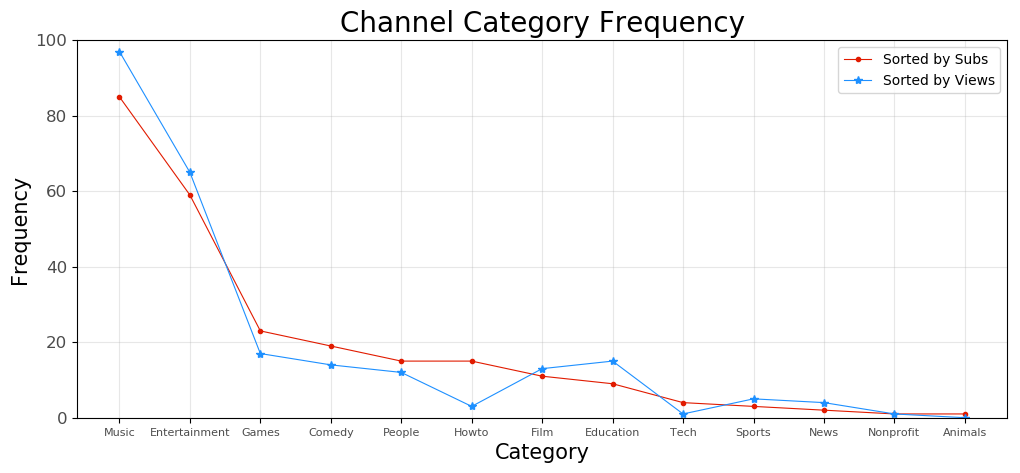

In [12]:
subsf_info = info['Channel frequncy by subs']
viewsf_info = info['Channel frequncy by views']

plt.figure(figsize=(12,5), dpi= 100)
plt.plot(subsf_info, linewidth = 0.8, marker = '.', label = "Sorted by Subs", color='#E11B00')
plt.plot(viewsf_info, linewidth = 0.8, marker = '*', label = "Sorted by Views", color='#1E90FF')

plt.xlabel("Category", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.ylim(0, 100)
plt.xticks(fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Channel Category Frequency", fontsize=20)
plt.grid(axis='both', alpha=.3)
plt.legend()
plt.show()

In [13]:
def barPlot_Creation(datafram_name, num_groups):
    n_groups = num_groups
    max_stat = datafram_name['Avg Max Yearly Earning'].sort_values(ascending=False).tolist()
    min_stat = datafram_name['Avg Min Yearly Earning'].sort_values(ascending=False).tolist()
    stats = datafram_name['Category'].tolist()
    max_info = pd.DataFrame(list(zip(stats, max_stat)), columns=['stat','value'])
    min_info = pd.DataFrame(list(zip(stats, min_stat)), columns=['stat','value'])

    fig, ax = plt.subplots(figsize=(15,7), dpi=100)
    index = np.arange(n_groups)
    bar_width = 0.3
    opacity = 1.0
 
    bar1 = plt.bar(index, max_stat, bar_width,
    alpha=opacity,
    color='#ff0000',
    label='Max Yearly Earning')
 
    bar2 = plt.bar(index + bar_width, min_stat, bar_width,
    alpha=opacity,
    color='#282828',
    label='Min Yearly Earning')
 
    plt.title('Youtube Channel Total Earning Sorted by Video Category', fontsize=20)
    plt.xticks(index + 0.07, stats)
    plt.legend()
    
    for row in max_info.itertuples():
        ax.text(row.Index, row.value+100000, s=round(row.value, 2), ha= 'center', verticalalignment='bottom', fontsize=8)
    for row in min_info.itertuples():
        ax.text(row.Index+.46, row.value+100000, s=round(row.value, 2), ha= 'center', verticalalignment='bottom', fontsize=8)

    plt.ylabel('USD - Ten Million', fontsize=15)
    plt.xlabel('Category', fontsize=15)
    ax.set_xticklabels(max_info.stat, rotation=30, fontdict={'horizontalalignment': 'center', 'size':12})
    plt.grid(axis='both', alpha=.3)
    plt.tight_layout()
    plt.show()

### Earning distribution with all datasets

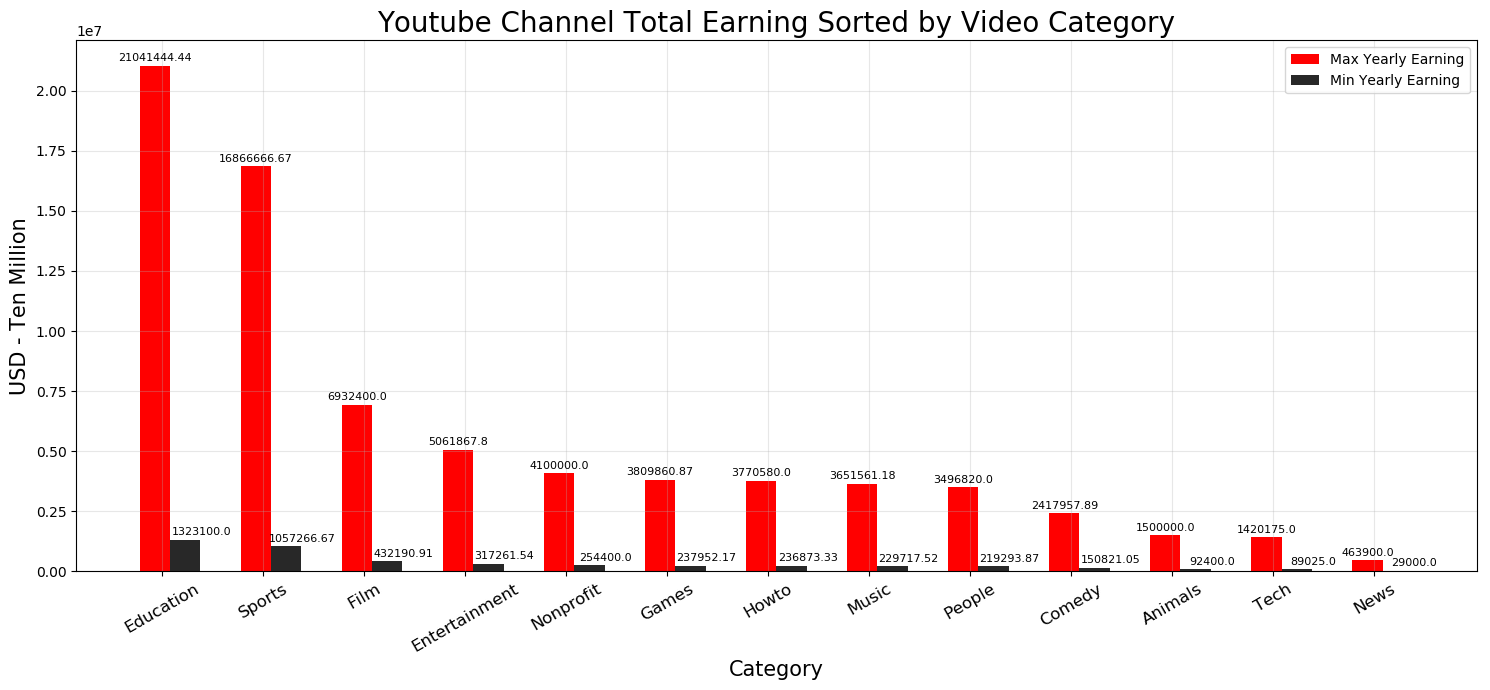

In [14]:
barPlot_Creation(categories_subs_info, 13)

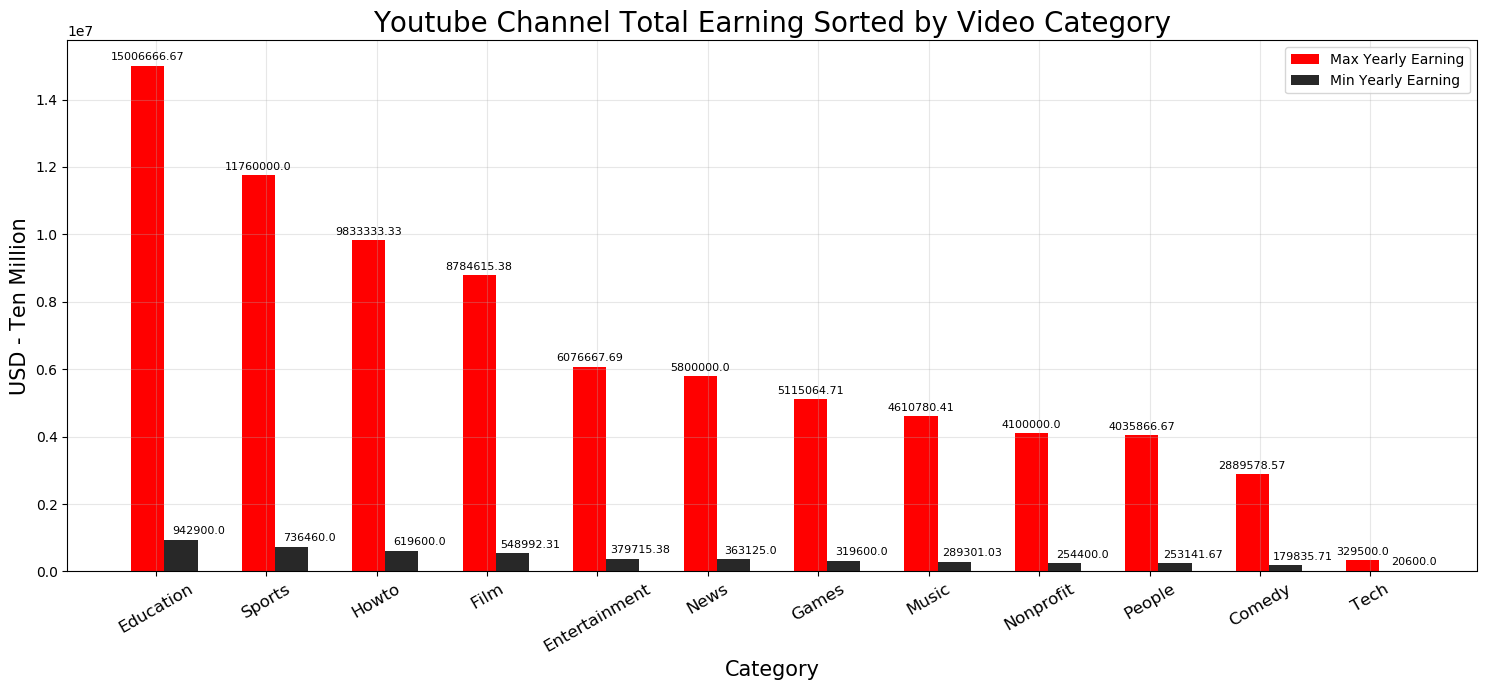

In [15]:
barPlot_Creation(categories_views_info, 12)

### Earning distribution without outlier

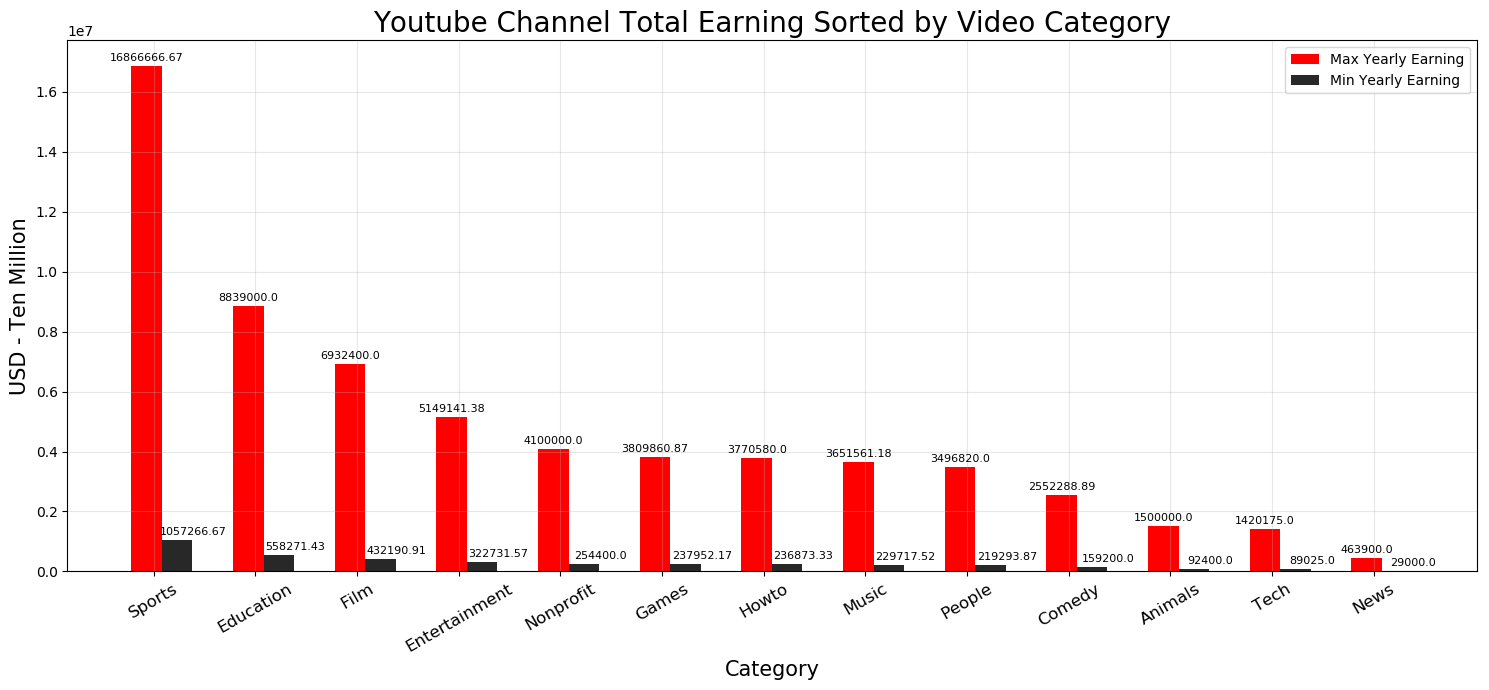

In [16]:
barPlot_Creation(info_subs, 13)

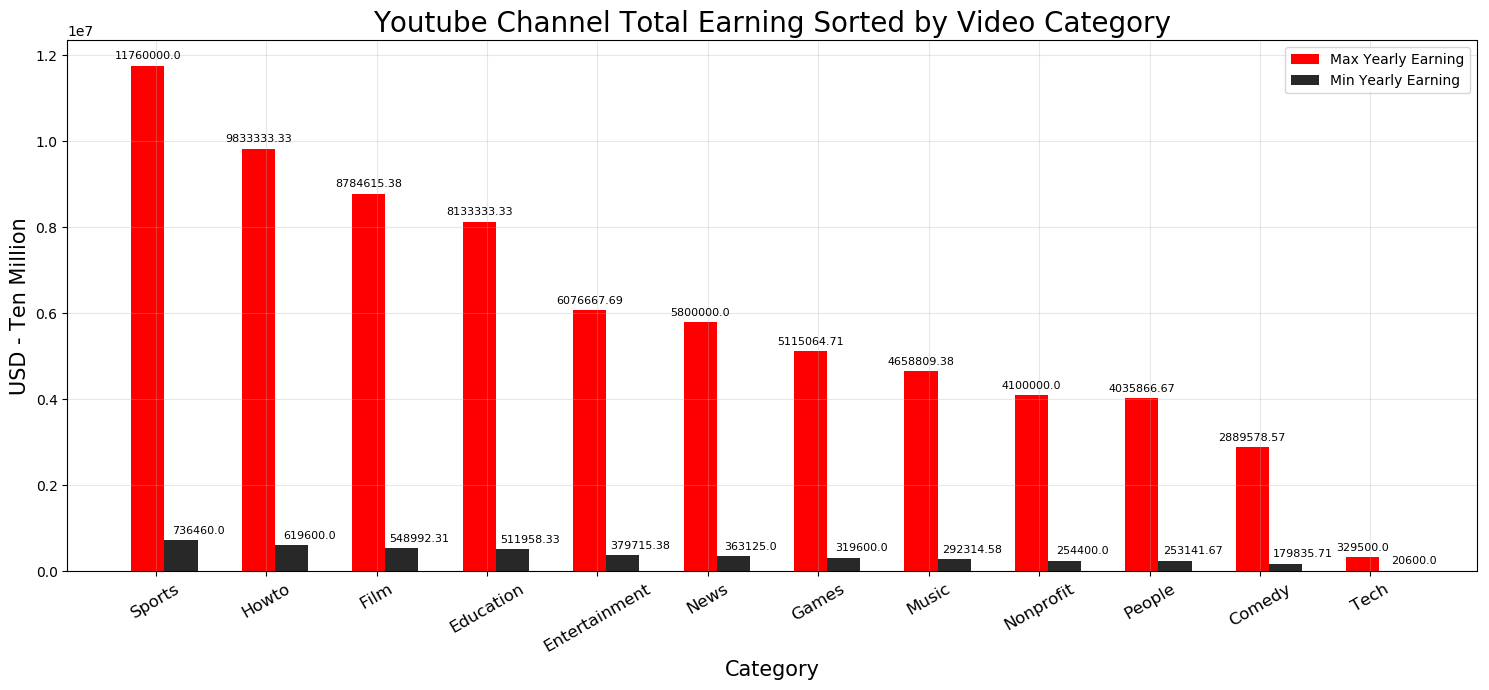

In [17]:
barPlot_Creation(info_views, 12)

Without outlier, sports type Youtube channel earns the largest amount of money.
On top of that, we can notice that there is a big difference between news category channel with large amount of views and subscribers. The earning amount of howto type channel has this large difference as well.
This might because we watch news on Youtube page a lot but tend to not subscribe the news channel.

In [18]:
educationViews = top250_views_df[top250_views_df['Category'] == 'Education']
educationViews = educationViews.sort_values(by='Max Yearly Earning',ascending=True)

entertainmentViews = top250_views_df[top250_views_df['Category'] == 'Entertainment']
entertainmentViews_tail = entertainmentViews.sort_values(by='Max Yearly Earning',ascending=True)[:10]
entertainmentViews_top = entertainmentViews.sort_values(by='Max Yearly Earning',ascending=True)[55:]

In [19]:
# notice that their might be the outlier among the data - $0.00 
educationViews.describe()

,Unnamed: 0,US Rank,Uploads,Subscribers,Views,Daily Average Views,Min Daily Earning,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank
count,$15.00,$15.00,$15.00,$15.00,$15.00,$15.00,$15.00,$15.00,$15.00,$15.00,$15.00,$15.00,$15.00,$15.00
mean,$132.40,$133.40,"$1,113.13","$10,309,591.07","$6,857,156,364.33","$10,345,045.27","$2,595.93","$41,700.00","$78,200.00","$1,248,293.33","$942,900.00","$15,006,666.67","$1,012.53",$306.27
std,$87.10,$87.10,$809.17,"$10,559,040.99","$6,555,615,001.13","$22,265,313.54","$5,549.15","$88,902.64","$166,688.52","$2,661,147.33","$2,008,647.34","$32,013,935.95",$821.84,$199.57
min,$2.00,$3.00,$157.00,"$3,084,243.00","$2,891,962,785.00","$-903,511.00",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$11.00,$7.00
25%,$67.00,$68.00,$600.50,"$4,119,910.50","$3,250,797,769.00","$1,505,075.00",$376.50,"$6,050.00","$11,300.00","$180,600.00","$135,450.00","$2,150,000.00",$302.00,$157.50
50%,$132.00,$133.00,$864.00,"$6,427,522.00","$4,338,437,422.00","$4,380,210.00","$1,100.00","$17,500.00","$32,900.00","$525,600.00","$394,200.00","$6,300,000.00",$832.00,$302.00
75%,$202.50,$203.50,"$1,227.50","$11,527,690.50","$6,355,278,239.50","$6,521,455.00","$1,600.00","$26,050.00","$48,900.00","$782,550.00","$586,950.00","$9,350,000.00","$1,697.50",$465.00
max,$245.00,$246.00,"$2,683.00","$44,127,136.00","$25,541,274,029.00","$88,514,800.00","$22,100.00","$354,100.00","$663,900.00","$10,600,000.00","$8,000,000.00","$127,500,000.00","$2,650.00",$565.00


In [20]:
educationViews[educationViews['Max Yearly Earning'] == 0]

,Unnamed: 0,US Rank,Grade,Name,Uploads,Subscribers,Views,Category,Created Date,Daily Average Subs,Daily Average Views,Min Daily Earning,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,URL
73,73,74,A,Kids TV - Nursery Rhymes And Baby,2444,12154359,6076353301,Education,"Aug 30th, 2013",12910,-290520,0,0,0,0,0,0,267,175,https://socialblade.com/youtube/user/7pq3ko42y...
184,184,185,B+,Kids Channel - Cartoon Videos for,2494,4057289,3414780410,Education,"Jul 13th, 2013",3033,-903511,0,0,0,0,0,0,1734,430,https://socialblade.com/youtube/user/thekydstv


In [21]:
# drop the first row of the dataframe
educationViews.drop(educationViews.head(1).index,inplace=True)
educationViews.drop(educationViews.head(2).index,inplace=True)

In [22]:
def youtubeChannelEarning(dataframe_name, category):    
    dataframe_name.index = dataframe_name['Name']
    if dataframe_name['Max Yearly Earning'].max() < 10000000:
        ax = dataframe_name[['Max Yearly Earning']].plot(kind='barh', align='center', figsize=(15,7), linewidth=.9, color='#EE82EE')
        plt.xlabel('USD', fontsize=15)
    elif dataframe_name['Max Yearly Earning'].max() > 100000000:
        ax = dataframe_name[['Max Yearly Earning']].plot(kind='barh', align='center', figsize=(15,7), linewidth=.9, color='#FFA500')
        plt.xlabel('USD - hundred million', fontsize=15)
    else:
        ax = dataframe_name[['Max Yearly Earning']].plot(kind='barh', align='center', figsize=(15,7), linewidth=.9, color='#32CD32')
        plt.xlabel('USD - ten million', fontsize=15)
        
    plt.title('Earning Distribution of ' + category + ' Channel in top 250 list', fontsize=20)
    plt.ylabel('Youtube Channel', fontsize=15)
    plt.grid(axis='both', alpha=.3)
    plt.show()

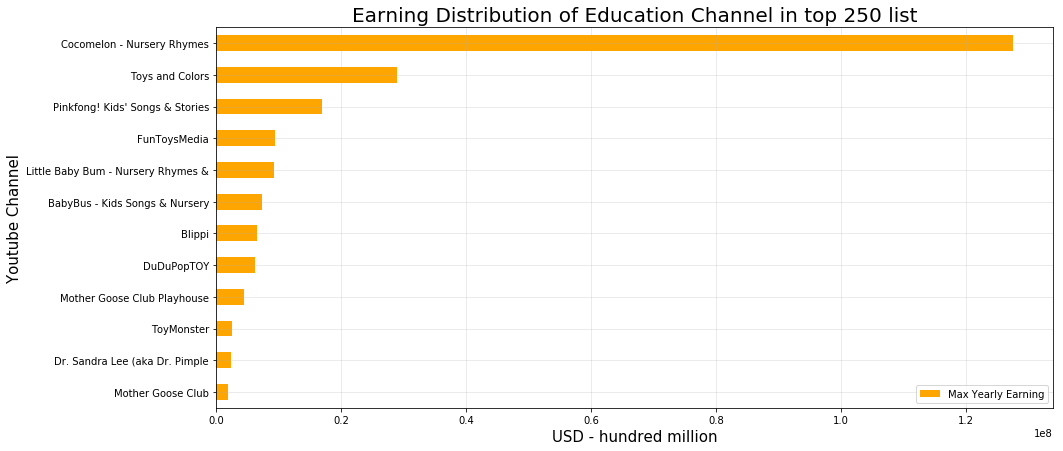

In [23]:
youtubeChannelEarning(educationViews, 'Education')

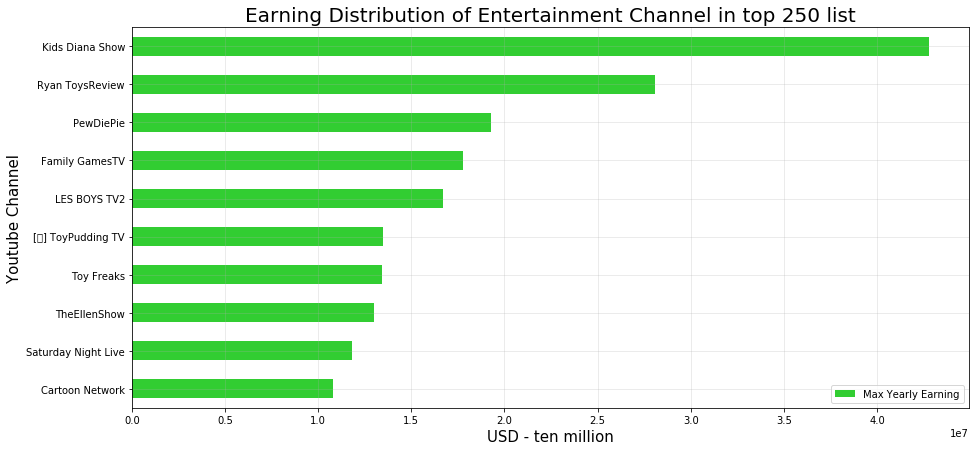

In [24]:
youtubeChannelEarning(entertainmentViews_top, 'Entertainment')

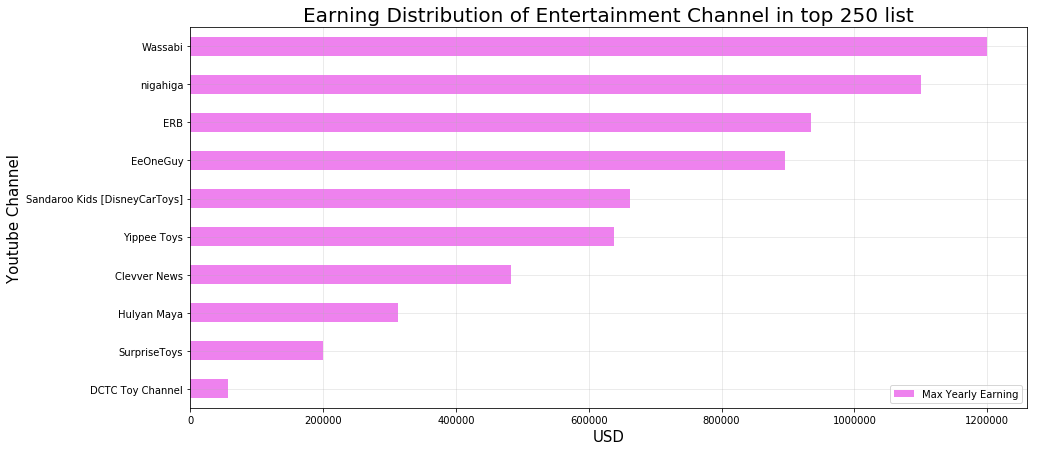

In [25]:
youtubeChannelEarning(entertainmentViews_tail, 'Entertainment')

There are lots of Entertainment type Youtube channel (65). Some of the channels earns more money than others and some are lower than average. The mean earning of Entertainment channel is not that high. We might draw the conclusion that "Entertainment" type Youtube channel might be too competitive to make the largest amount of money. It is not the most profitable channel type in average.

In [90]:
top250_subs_df = top250_subs_df.sort_values(by='Max Yearly Earning',ascending=False)
df1 = top250_subs_df[:175]
df2 = top250_subs_df[176:]
df3 = top250_subs_df

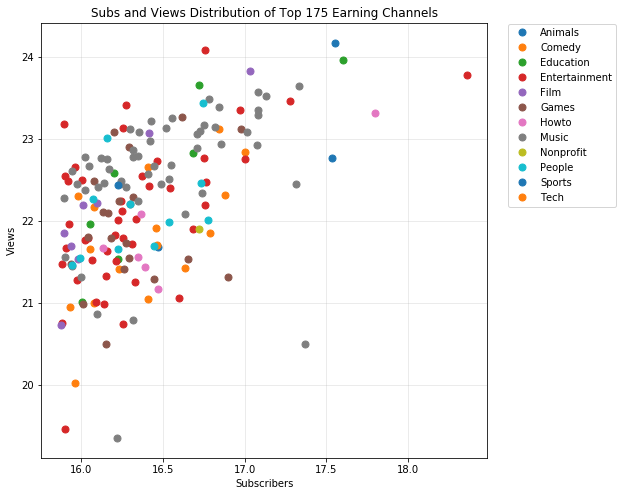

In [91]:
fig, ax = plt.subplots(figsize=(8, 8))
categories = df1.groupby('Category')
for name, cate in categories:
    ax.plot(np.log(cate.Subscribers), np.log(cate.Views), marker='o', linestyle='', ms=7, label=name)

plt.title('Subs and Views Distribution of Top 175 Earning Channels', fontsize=12)    
ax.set_xlabel('Subscribers')
ax.set_ylabel('Views')
plt.grid(axis='both', alpha=.3)
plt.legend(bbox_to_anchor=(1.3, 1.01))
plt.show()

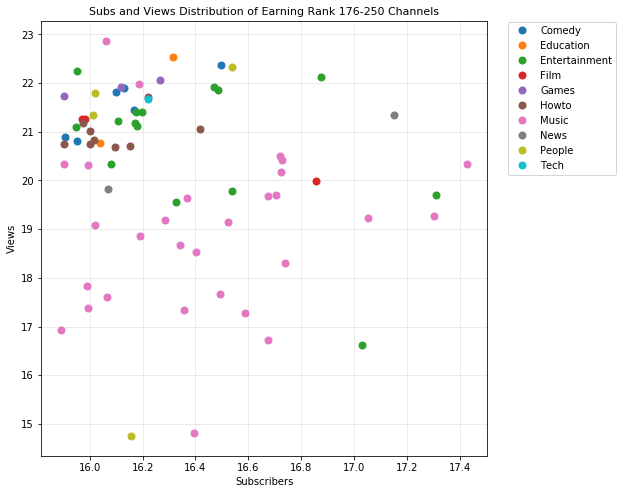

In [92]:
fig, ax = plt.subplots(figsize=(8, 8))
categories = df2.groupby('Category')
for name, cate in categories:
    ax.plot(np.log(cate.Subscribers), np.log(cate.Views), marker='o', linestyle='', ms=7, label=name)
    
plt.title('Subs and Views Distribution of Earning Rank 176-250 Channels', fontsize=11) 
ax.set_xlabel('Subscribers')
ax.set_ylabel('Views')
plt.grid(axis='both', alpha=.3)
plt.legend(bbox_to_anchor=(1.3, 1.01))
plt.show()

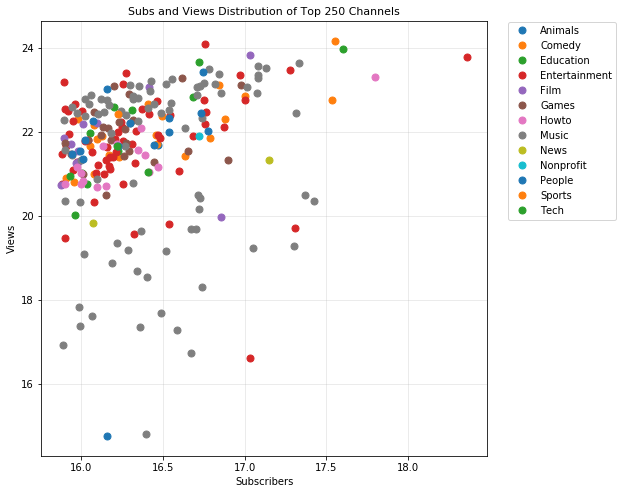

In [94]:
fig, ax = plt.subplots(figsize=(8, 8))
categories = df3.groupby('Category')
for name, cate in categories:
    ax.plot(np.log(cate.Subscribers), np.log(cate.Views), marker='o', linestyle='', ms=7, label=name)
    
plt.title('Subs and Views Distribution of Top 250 Channels', fontsize=11) 
ax.set_xlabel('Subscribers')
ax.set_ylabel('Views')
plt.grid(axis='both', alpha=.3)
plt.legend(bbox_to_anchor=(1.3, 1.01))
plt.show()